# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras as K

Using TensorFlow backend.


In [3]:
import pickle
import gzip

# Load the MNIST dataset

The dataset is composed in three parts: training, validation and test. We can load each of them in a different variable with the following command. The file is also stored locally on the Tutorials website.

In [4]:
dataset = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(dataset,encoding='bytes')
dataset.close()

We define the one_hot encoding function that is able to convert the label that gives the correct digit into a vector of dimension 10.

In [5]:
n_categories = 10
def hot_enc(j):
    e = np.zeros([len(j),n_categories])
    e[range(len(j)),j]=1.
    return e

Each part of the dataset has two parts: the image and its correct classification. We save the images in a variable and the label in another variable. In order to apply the _crossentropy_ cost function, we apply one hot encoding to the labels, i.e. $3 \rightarrow (0,0,0,1,0,0,0,0,0,0)$.

In [6]:
training_in, training_out = training_data 
N_pixels = np.shape(training_in)[1]
N_width = int(np.sqrt(N_pixels))

# training_in = 50000 images of [28,28] pixels 
# training_out = int number between 0 and 9 

training_out_HOT = hot_enc(training_out)
N_samples = len(training_in)

test_in, test_out = test_data # test_in = 10000 images of [28,28] pixels 
test_out_HOT = hot_enc(test_out)
N_test = len(test_in)

Reshape the images so that they are `N_width x N_width x 1` instead of `N_pixels`. The last 1 indicates black and white image (single channel)

In [7]:
training_in = training_in.reshape([-1, N_width, N_width, 1])  # -1 automatically calculates the remaining dimension
test_in = test_in.reshape([-1, N_width, N_width, 1])

# Define the neural network 

In [8]:
def create_net():
    net = K.models.Sequential()
    
    net.add(K.layers.Conv2D(input_shape=(N_width,N_width,1), # width X height X channels (in this case b/w is 1 channel)
           filters=8, # number of features to extract
           kernel_size=[5,5], #size of the kernel
           activation='relu',
           padding='same')) # "boundary" conditions
    
    net.add(K.layers.AveragePooling2D(pool_size=2))
    
    net.add(K.layers.Conv2D(
           filters=8,
           kernel_size=[5,5],
           activation='relu',
           padding='same'))
    
    net.add(K.layers.AveragePooling2D(pool_size=2))
    
    net.add(K.layers.Flatten())
    net.add(K.layers.Dense(n_categories, activation="softmax"))   
    
    net.compile(loss="categorical_crossentropy", 
               metrics=["categorical_accuracy"],
               optimizer='adam')
    net.summary()
    return net

In [9]:
net = create_net()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1608      
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3930      
Total params: 5,746
Trainable params: 5,746
Non-trainable params: 0
_________________________________________________________________


# Train the network

In [10]:
costs = []
batchsize = 100
N_batches = int(N_samples/batchsize)-1

Keep in mind that we call _Epoch_ each time we go through the entire dataset. In other words, the code below trains the network for a single epoch.

In [11]:
for i in range(N_batches):
    costs.append(
        net.train_on_batch(training_in[i*batchsize:(i+1)*batchsize,:], 
                          training_out_HOT[i*batchsize:(i+1)*batchsize,:])[0]  #First output of train on batch is COST, second the METRIC
    )
    print("Training: %d/%d,\tCost = %2.7f" % (i,N_batches,costs[-1]))

Training: 0/499,	Cost = 2.2836599
Training: 1/499,	Cost = 2.2823019
Training: 2/499,	Cost = 2.2809696
Training: 3/499,	Cost = 2.2889576
Training: 4/499,	Cost = 2.2572775
Training: 5/499,	Cost = 2.2778716
Training: 6/499,	Cost = 2.2480998
Training: 7/499,	Cost = 2.2620327
Training: 8/499,	Cost = 2.2348483
Training: 9/499,	Cost = 2.2341194
Training: 10/499,	Cost = 2.2210548
Training: 11/499,	Cost = 2.2199509
Training: 12/499,	Cost = 2.2408574
Training: 13/499,	Cost = 2.1480520
Training: 14/499,	Cost = 2.1703069
Training: 15/499,	Cost = 2.1723359
Training: 16/499,	Cost = 2.1322086
Training: 17/499,	Cost = 2.1153266
Training: 18/499,	Cost = 2.0920041
Training: 19/499,	Cost = 2.0849936
Training: 20/499,	Cost = 2.0612295
Training: 21/499,	Cost = 2.0126357
Training: 22/499,	Cost = 2.0163093
Training: 23/499,	Cost = 2.0030754
Training: 24/499,	Cost = 1.9753823
Training: 25/499,	Cost = 1.8937659
Training: 26/499,	Cost = 1.9063717
Training: 27/499,	Cost = 1.8324051
Training: 28/499,	Cost = 1.728

Training: 241/499,	Cost = 0.2567531
Training: 242/499,	Cost = 0.5326920
Training: 243/499,	Cost = 0.3485569
Training: 244/499,	Cost = 0.4608072
Training: 245/499,	Cost = 0.4398954
Training: 246/499,	Cost = 0.5530253
Training: 247/499,	Cost = 0.7589986
Training: 248/499,	Cost = 0.3438108
Training: 249/499,	Cost = 0.4955930
Training: 250/499,	Cost = 0.2960352
Training: 251/499,	Cost = 0.3534642
Training: 252/499,	Cost = 0.3054363
Training: 253/499,	Cost = 0.3524454
Training: 254/499,	Cost = 0.2770233
Training: 255/499,	Cost = 0.3005232
Training: 256/499,	Cost = 0.2958634
Training: 257/499,	Cost = 0.2462645
Training: 258/499,	Cost = 0.3800678
Training: 259/499,	Cost = 0.3112981
Training: 260/499,	Cost = 0.2694618
Training: 261/499,	Cost = 0.2758347
Training: 262/499,	Cost = 0.3635988
Training: 263/499,	Cost = 0.6004313
Training: 264/499,	Cost = 0.3955016
Training: 265/499,	Cost = 0.4317004
Training: 266/499,	Cost = 0.5114193
Training: 267/499,	Cost = 0.6212888
Training: 268/499,	Cost = 0.

Training: 470/499,	Cost = 0.3012697
Training: 471/499,	Cost = 0.2220025
Training: 472/499,	Cost = 0.4785308
Training: 473/499,	Cost = 0.3489027
Training: 474/499,	Cost = 0.3826952
Training: 475/499,	Cost = 0.2378300
Training: 476/499,	Cost = 0.4082142
Training: 477/499,	Cost = 0.3046075
Training: 478/499,	Cost = 0.1859550
Training: 479/499,	Cost = 0.5146540
Training: 480/499,	Cost = 0.2767264
Training: 481/499,	Cost = 0.2701322
Training: 482/499,	Cost = 0.1941017
Training: 483/499,	Cost = 0.3875972
Training: 484/499,	Cost = 0.1440228
Training: 485/499,	Cost = 0.2523559
Training: 486/499,	Cost = 0.2575527
Training: 487/499,	Cost = 0.1448227
Training: 488/499,	Cost = 0.2480423
Training: 489/499,	Cost = 0.5318943
Training: 490/499,	Cost = 0.5897920
Training: 491/499,	Cost = 0.2223407
Training: 492/499,	Cost = 0.3551353
Training: 493/499,	Cost = 0.1929469
Training: 494/499,	Cost = 0.3446150
Training: 495/499,	Cost = 0.5154169
Training: 496/499,	Cost = 0.4131287
Training: 497/499,	Cost = 0.

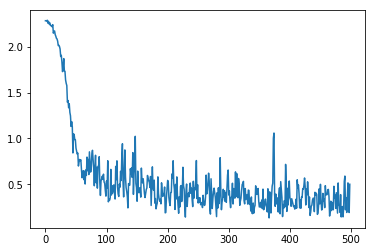

In [12]:
plt.plot(costs)

In [13]:
predictions = np.argmax(net.predict_on_batch(test_in),axis=1)
errors = np.count_nonzero(predictions- test_out)
accuracy = (1- errors/N_test)*100
print(accuracy)

91.97999999999999


# Show the digits

In [14]:
def show_image(which):
    plt.figure()
    plt.imshow(np.reshape(which,[N_width, N_width]), cmap='binary')
    plt.show()

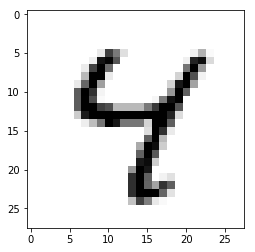

In [21]:
show_image(test_in[6])

Show the indices of the digits that were missclassified. You can look at them with the function `show_image(test_in[index])`, and get the proposed category with `predictions[index]`, if `index` is the index of the missclassified image.

In [16]:
np.where(predictions - test_out != 0)

(array([   8,   33,   62,   63,  121,  149,  151,  167,  193,  195,  233,
         241,  247,  259,  290,  300,  307,  313,  318,  320,  321,  325,
         340,  341,  349,  352,  362,  376,  381,  403,  406,  412,  435,
         444,  445,  448,  457,  460,  464,  468,  478,  479,  497,  502,
         507,  511,  531,  532,  543,  550,  551,  565,  571,  578,  582,
         591,  605,  610,  613,  619,  628,  629,  658,  659,  684,  689,
         691,  692,  707,  712,  717,  720,  728,  740,  748,  760,  766,
         791,  839,  844,  857,  898,  924,  938,  939,  944,  947,  950,
         951,  956,  960,  965,  982, 1003, 1012, 1014, 1032, 1039, 1044,
        1062, 1068, 1082, 1089, 1091, 1096, 1101, 1107, 1112, 1114, 1119,
        1128, 1169, 1173, 1181, 1185, 1191, 1192, 1194, 1198, 1204, 1206,
        1208, 1226, 1232, 1242, 1247, 1248, 1253, 1256, 1260, 1269, 1270,
        1283, 1289, 1299, 1314, 1315, 1319, 1326, 1375, 1378, 1393, 1404,
        1409, 1410, 1433, 1440, 1444, 

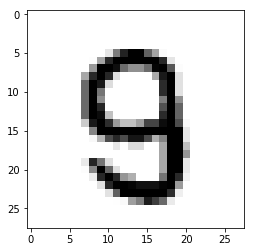

Proposed: 8
True: 9


In [17]:
show_image(test_in[241])
print("Proposed:", predictions[241])
print("True:", test_out[241])

---

# Automatic training with Keras function

In [18]:
net = create_net()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1608      
_________________________________________________________________
average_pooling2d_4 (Average (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 5,746
Trainable params: 5,746
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = net.fit(training_in, 
                  training_out_HOT, 
                  batch_size=100,
                 epochs=10,
                 validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.5458 - categorical_accuracy: 0.8437 - val_loss: 0.2460 - val_categorical_accuracy: 0.9292
Epoch 2/10
45000/45000 [==============================] - 10s 219us/step - loss: 0.1934 - categorical_accuracy: 0.9434 - val_loss: 0.1800 - val_categorical_accuracy: 0.9464
Epoch 3/10
45000/45000 [==============================] - 9s 209us/step - loss: 0.1430 - categorical_accuracy: 0.9576 - val_loss: 0.1409 - val_categorical_accuracy: 0.9586
Epoch 4/10
45000/45000 [==============================] - 9s 208us/step - loss: 0.1187 - categorical_accuracy: 0.9653 - val_loss: 0.1269 - val_categorical_accuracy: 0.9614
Epoch 5/10
45000/45000 [==============================] - 10s 214us/step - loss: 0.1016 - categorical_accuracy: 0.9696 - val_loss: 0.1220 - val_categorical_accuracy: 0.9634
Epoch 6/10
45000/45000 [==============================] - 10s 212us/step - loss: 0.0901 -

KeyboardInterrupt: 

Show the difference between categorical accuracy calculated on the training dataset itself and on the validation set.

In [ ]:
fig = plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth = 3, label="Training accuracy")
plt.plot(history.history['val_categorical_accuracy'], linewidth=3,  label="Validation accuracy")
plt.legend()
plt.show()

The actual accuracy is lower than what you get on the training set itself.

---

# Add noise to the dataset
Test prediction of the network on a noisy test dataset.


In [63]:
test_in = test_in.reshape([-1,N_pixels])

In [64]:
val_noise = np.random.uniform(low=-0.4, high=0.4, size=[N_test,N_pixels])
bool_noise = np.random.uniform(low=0, high=1, size=[N_test,N_pixels])

test_in[bool_noise>0.5] = np.maximum(np.minimum(test_in[bool_noise>0.5] + val_noise[bool_noise>0.5],1),0)

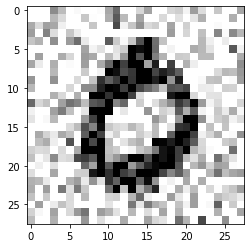

In [66]:
show_image(test_in[3])

Accuracy on a noisy dataset

In [68]:
test_in = test_in.reshape([-1,N_width,N_width,1])
predictions = np.argmax(net.predict_on_batch(test_in),axis=1)
errors = np.count_nonzero(predictions- test_out)
accuracy = (1- errors/N_test)*100
print(accuracy)

90.66


---

# Delete the half of the picture

In [69]:
test_in[:,:,int(N_width/2):,0] = 0

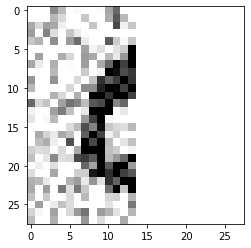

In [70]:
show_image(test_in[3])

In [71]:
test_in = test_in.reshape([-1,N_width,N_width,1])
predictions = np.argmax(net.predict_on_batch(test_in),axis=1)
errors = np.count_nonzero(predictions- test_out)
accuracy = (1- errors/N_test)*100
print(accuracy)

58.489999999999995


The accuracy is still high, considering that the probability of guessing one digit out of ten possibilities is 1/10.